In [1]:
import pandas as pd

input_data = [[0, 1],
              [-1 / 2, 3 / 2],
              [3 / 2, 5 / 2],
              [1, 3]]


def show(data):
    return pd.DataFrame(data, columns=["" for _ in range(len(data[0]))])


show(input_data)


,,
0,0.0,1.0
1,-0.5,1.5
2,1.5,2.5
3,1.0,3.0


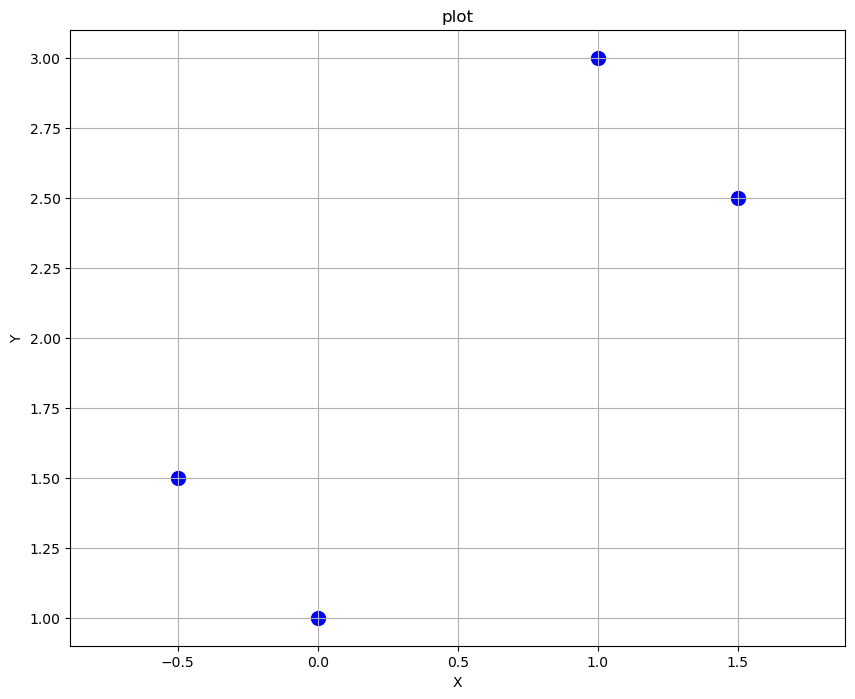

In [2]:
import matplotlib.pyplot as plt


def create_scatterplot(data):
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, color='blue', s=100)  # s is the marker size
    plt.title('plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


create_scatterplot(input_data)


In [3]:
import pandas as pd


# --- Mean Centering without NumPy ---
def create_mean_centered_matrix(data):
    num_points = len(data)
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]
    mean_x = sum(x_coords) / num_points
    mean_y = sum(y_coords) / num_points
    centered_data = [[point[0] - mean_x, point[1] - mean_y] for point in data]
    return centered_data


d = create_mean_centered_matrix((input_data))

show(d)


,,
0,-0.5,-1.0
1,-1.0,-0.5
2,1.0,0.5
3,0.5,1.0


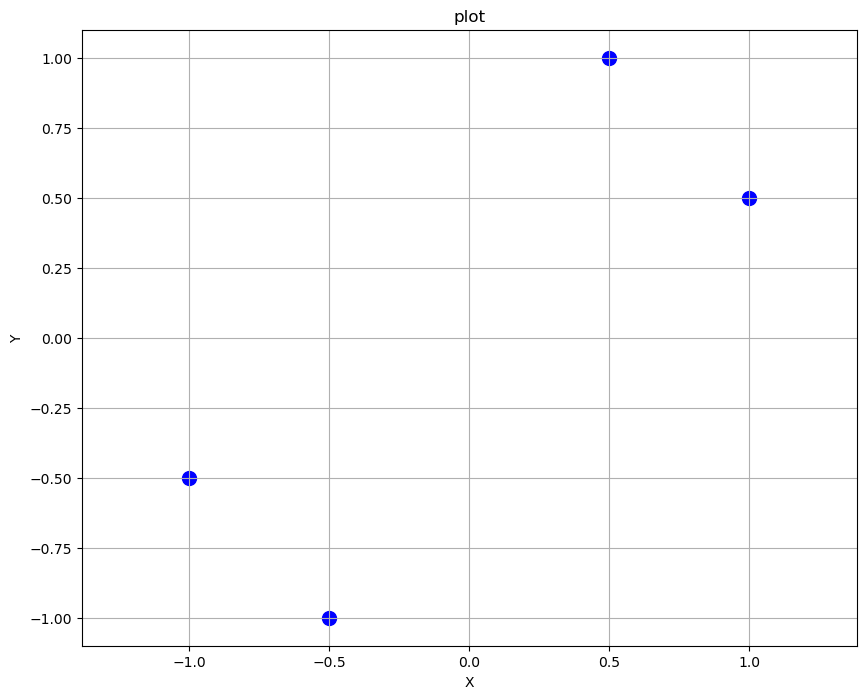

In [4]:
create_scatterplot(d)

In [5]:
def transponse(data):
    num_rows = len(data)
    num_cols = len(data[0])

    transposed = [[data[i][j] for i in range(num_rows)] for j in range(num_cols)]

    return transposed


d_t = transponse(d)
print(d_t)
show(d_t)

[[-0.5, -1.0, 1.0, 0.5], [-1.0, -0.5, 0.5, 1.0]]


,,,,
0,-0.5,-1.0,1.0,0.5
1,-1.0,-0.5,0.5,1.0


In [6]:
from typing import List


def multiply_matrices(matrix_a, matrix_b):
    rows_a = len(matrix_a)
    cols_a = len(matrix_a[0])
    rows_b = len(matrix_b)
    cols_b = len(matrix_b[0])

    if cols_a != rows_b:
        raise ValueError()
    result_matrix = [[0 for _ in range(cols_b)] for _ in range(rows_a)]
    for i in range(rows_a):
        for j in range(cols_b):
            for k in range(cols_a):  # or range(rows_b)
                result_matrix[i][j] += matrix_a[i][k] * matrix_b[k][j]

    return result_matrix

temp = multiply_matrices(d_t, d)
show(temp)

,,
0,2.5,2.0
1,2.0,2.5


In [7]:
def multiply_matrix_scalar(scalar: float, matrix: List[List[float]]) -> List[List[float]]:
    return [[element * scalar for element in row] for row in matrix]

scale = 1 / (len(d) - 1)
cov = multiply_matrix_scalar(scale, temp)
show(cov)

,,
0,0.833333,0.666667
1,0.666667,0.833333


In [8]:
import numpy as np

C = np.array(cov)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)

print(eigenvalues)
print(eigenvectors)

[1.5        0.16666667]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
largest_eigen_vector = [[eigenvectors[0, 0]], [eigenvectors[1, 0]]]
result_a = multiply_matrices(d, largest_eigen_vector)
show(result_a)

,
0,-1.06066
1,-1.06066
2,1.06066
3,1.06066


In [10]:
result_b = multiply_matrices(d, eigenvectors)
show(result_b)

,,
0,-1.06066,-0.353553
1,-1.06066,0.353553
2,1.06066,-0.353553
3,1.06066,0.353553


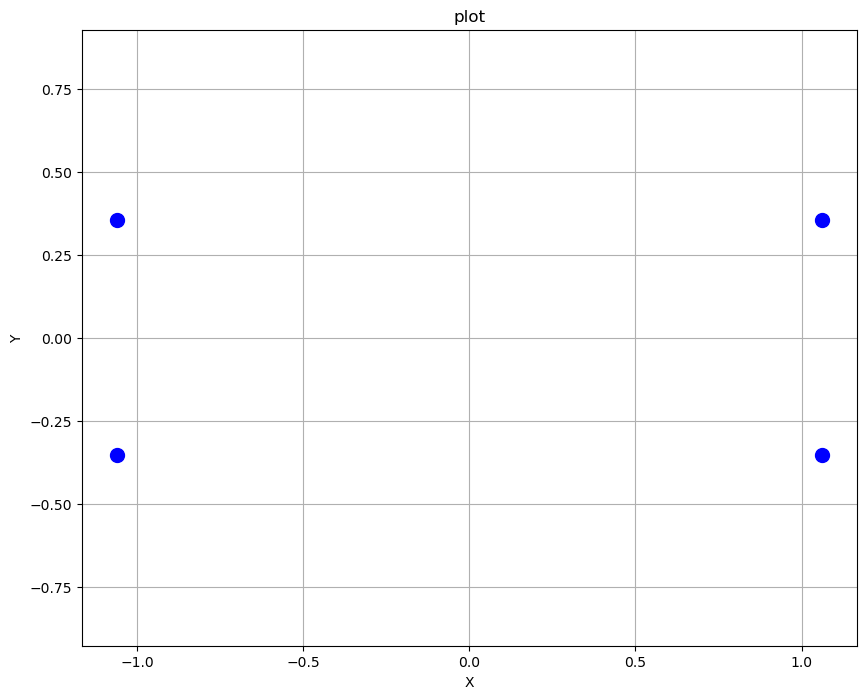

In [11]:
create_scatterplot(result_b)

In [12]:
import math


def distance_calculation(p1, p2):
    assert len(p1) == len(p2)
    sum = 0
    for k in range(len(p1)):
        sum += (p1[k] - p2[k])**2
    return math.sqrt(sum)

def matrix_distance(matrix):
    distance_matrix = [[0.0] * len(matrix) for _ in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            distance_matrix[i][j] = distance_calculation(matrix[i], matrix[j])
    return distance_matrix

show(matrix_distance(d))

,,,,
0,0.000000,0.707107,2.121320,2.236068
1,0.707107,0.000000,2.236068,2.121320
2,2.121320,2.236068,0.000000,0.707107
3,2.236068,2.121320,0.707107,0.000000


In [13]:
show(matrix_distance(result_a))

,,,,
0,0.00000,0.00000,2.12132,2.12132
1,0.00000,0.00000,2.12132,2.12132
2,2.12132,2.12132,0.00000,0.00000
3,2.12132,2.12132,0.00000,0.00000


In [14]:
show(matrix_distance(result_b))

,,,,
0,0.000000,0.707107,2.121320,2.236068
1,0.707107,0.000000,2.236068,2.121320
2,2.121320,2.236068,0.000000,0.707107
3,2.236068,2.121320,0.707107,0.000000
